In [36]:
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd

#leitura do arquivo ecg.mat

mat = scipy.io.loadmat('ecg.mat')
print mat

{'ecg': array([[ 0.45617899],
       [ 0.42832697],
       [ 0.39055694],
       ..., 
       [-0.09082583],
       [-0.08186996],
       [-0.07825327]]), '__version__': '1.0', '__header__': 'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Thu Mar 16 15:38:58 2000', '__globals__': []}


In [8]:
"""DFT and FFT"""
import math

def iexp(n):
    return complex(math.cos(n), math.sin(n))

def is_pow2(n):
    return False if n == 0 else (n == 1 or is_pow2(n >> 1))

def dft(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(-2 * math.pi * i * k / n) for k in range(n)))
            for i in range(n)]

def dftinv(xs):
    "naive dft"
    n = len(xs)
    return [sum((xs[k] * iexp(2 * math.pi * i * k / n) for k in range(n))) / n
            for i in range(n)]

def fft_(xs, n, start=0, stride=1):
    "cooley-turkey fft"
    if n == 1: return [xs[start]]
    hn, sd = n // 2, stride * 2
    rs = fft_(xs, hn, start, sd) + fft_(xs, hn, start + stride, sd)
    for i in range(hn):
        e = iexp(-2 * math.pi * i / n)
        rs[i], rs[i + hn] = rs[i] + e * rs[i + hn], rs[i] - e * rs[i + hn]
        pass
    return rs

def fft(xs):
    assert is_pow2(len(xs))
    return fft_(xs, len(xs))

def fftinv_(xs, n, start=0, stride=1):
    "cooley-turkey fft"
    if n == 1: return [xs[start]]
    hn, sd = n // 2, stride * 2
    rs = fftinv_(xs, hn, start, sd) + fftinv_(xs, hn, start + stride, sd)
    for i in range(hn):
        e = iexp(2 * math.pi * i / n)
        rs[i], rs[i + hn] = rs[i] + e * rs[i + hn], rs[i] - e * rs[i + hn]
        pass
    return rs

def fftinv(xs):
    assert is_pow2(len(xs))
    n = len(xs)
    return [v / n for v in fftinv_(xs, n)]

if __name__ == "__main__":
    wave = [0, 1, 2, 3, 3, 2, 1, 0]
    dfreq = dft(wave)
    ffreq = fft(wave)
    dwave = dftinv(dfreq)
    fwave= fftinv(ffreq)
    print(dfreq)
    print(ffreq)
    print([v.real for v in dwave])
    print([v.real for v in fwave])
    pass




[(12+0j), (-5.82842712474619-2.414213562373095j), (2.220446049250313e-16+7.669517010585668e-17j), (-0.17157287525381137-0.4142135623730936j), 2.449293598294704e-16j, (-0.17157287525381507+0.4142135623730959j), (-3.885780586188048e-15+2.3008551031756994e-16j), (-5.828427124746189+2.4142135623730905j)]
[(12+0j), (-5.82842712474619-2.4142135623730954j), 0j, (-0.1715728752538097-0.4142135623730947j), 0j, (-0.17157287525381015+0.41421356237309537j), 0j, (-5.82842712474619+2.414213562373095j)]
[-1.1102230246251565e-15, 1.0000000000000004, 2.0, 2.999999999999999, 3.0000000000000004, 1.9999999999999982, 1.0000000000000013, 0.0]
[0.0, 1.0000000000000002, 2.0, 3.0, 3.0, 1.9999999999999998, 1.0, 0.0]


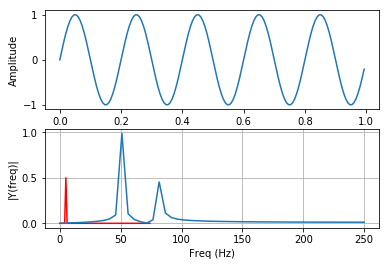

In [32]:
#código simples de fft da internet

from scipy.fftpack import fft
import numpy as np
# Number of sample points
N = 100
# sample spacing
T = 1.0 / 500.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [33]:
#nseitolok

import matplotlib.pyplot as plt
import plot.plotly as py
import numpy as np
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

ff = 5;   # frequency of the signal
y = np.sin(2*np.pi*ff*t)

n = len(y) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n/2)] # one side frequency range

Y = np.fft.fft(y)/n # fft computing and normalization
Y = Y[range(n/2)]

fig, ax = plt.subplots(2, 1)
ax[0].plot(t,y)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r') # plotting the spectrum
ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('|Y(freq)|')

plot_url = py.plot_mpl(fig, filename='mpl-basic-fft')

ImportError: No module named plot.plotly